[Matrix Factorization for Long-term Events (MFLEs) for Time Series Analytics with Python](https://medium.com/@kylejones_47003/matrix-factorization-for-long-term-events-mfles-for-time-series-analytics-with-python-71aba4800c91?source=your_stories_page-------------------------------------)
===============================================================================================================================================================================================================================================================================================

by: Kyle Jones\
published: 2025-01-10

In [ ]:
Requirements: 
scikit-learn==1.3.2
numpy==1.24.4
pandas==2.0.3
matplotlib==3.6.0

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_series = 100  # Number of time series
n_timepoints = 50  # Number of time points

# Simulated data matrix (rows: time series, columns: time points)
data_matrix = np.random.rand(n_series, n_timepoints)
df = pd.DataFrame(data_matrix)
print(df.head())

# Decompose the data matrix
svd = TruncatedSVD(n_components=10)  # Reduce to 10 latent features
latent_features = svd.fit_transform(data_matrix)

# Reconstruct the time series
reconstructed_matrix = svd.inverse_transform(latent_features)

# Prepare training and test datasets
X = latent_features[:, :-1]
y = latent_features[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


         0         1         2         3         4         5         6   \
0  0.374540  0.950714  0.731994  0.598658  0.156019  0.155995  0.058084   
1  0.969585  0.775133  0.939499  0.894827  0.597900  0.921874  0.088493   
2  0.031429  0.636410  0.314356  0.508571  0.907566  0.249292  0.410383   
3  0.908266  0.239562  0.144895  0.489453  0.985650  0.242055  0.672136   
4  0.642032  0.084140  0.161629  0.898554  0.606429  0.009197  0.101472   

         7         8         9   ...        40        41        42        43  \
0  0.866176  0.601115  0.708073  ...  0.122038  0.495177  0.034389  0.909320   
1  0.195983  0.045227  0.325330  ...  0.119594  0.713245  0.760785  0.561277   
2  0.755551  0.228798  0.076980  ...  0.962447  0.251782  0.497249  0.300878   
3  0.761620  0.237638  0.728216  ...  0.093103  0.897216  0.900418  0.633101   
4  0.663502  0.005062  0.160808  ...  0.940459  0.953929  0.914864  0.370159   

         44        45        46        47        48        49  
0  0

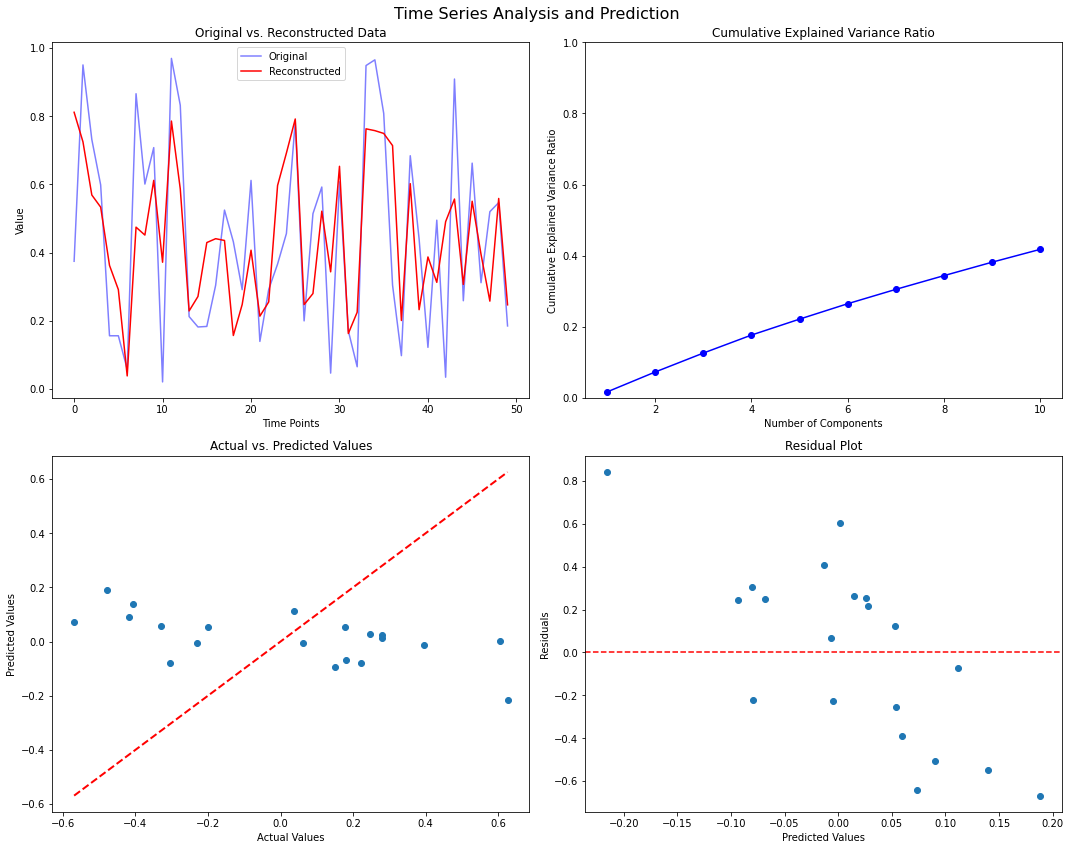

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Time Series Analysis and Prediction', fontsize=16)

# 1. Original vs. Reconstructed Data (for the first time series)
axes[0, 0].plot(data_matrix[:1].T, 'b-', alpha=0.5, label='Original')
axes[0, 0].plot(reconstructed_matrix[:1].T, color="Red", label='Reconstructed')
axes[0, 0].set_title('Original vs. Reconstructed Data')
axes[0, 0].set_xlabel('Time Points')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend()

# 2. Explained Variance Ratio
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
axes[0, 1].plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
axes[0, 1].set_title('Cumulative Explained Variance Ratio')
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('Cumulative Explained Variance Ratio')
axes[0, 1].set_ylim([0, 1])

# 3. Actual vs. Predicted Values
axes[1, 0].scatter(y_test, y_pred)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_title('Actual vs. Predicted Values')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')

# 4. Residual Plot
residuals = y_test - y_pred
axes[1, 1].scatter(y_pred, residuals)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_title('Residual Plot')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()
